## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
study_results_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_results_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.
mouse_count = len(study_results_complete["Mouse ID"].unique())
mouse_count

249

In [7]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
get_dups_df = study_results_complete[['Mouse ID', 'Timepoint']]
get_dups_df = get_dups_df.groupby(["Mouse ID"])
timepointCount = get_dups_df["Timepoint"].value_counts()

timepoint_summary_df = pd.DataFrame({"Timepoint": timepointCount})
only_dups_df = timepoint_summary_df.loc[timepoint_summary_df["Timepoint"] > 1]
only_dups_df

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [8]:
# Optional: Display all the data for the duplicate mouse ID. 
drop_mouse_df = study_results_complete.loc[study_results_complete["Mouse ID"] == "g989"]
drop_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
study_results_clean = study_results_complete.loc[study_results_complete["Mouse ID"] != "g989"]
#isClean = study_results_clean.loc[study_results_clean["Mouse ID"] == "g989"]
#isClean
study_results_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(study_results_clean["Mouse ID"].unique())
# Should be 1 less since only g989 was removed
mouse_count_clean

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
volume = study_results_clean.groupby(["Drug Regimen"])
regimen = volume["Drug Regimen"]
mean_vol = round(volume["Tumor Volume (mm3)"].mean(),2)
median_vol = round(volume["Tumor Volume (mm3)"].median(),2)
var_vol = round(volume["Tumor Volume (mm3)"].var(),2)
std_vol = round(volume["Tumor Volume (mm3)"].std(),2)
sem_vol = round(volume["Tumor Volume (mm3)"].sem(),2)

volume_summary_df = pd.DataFrame({"Vol (mm3) Mean": mean_vol,
                                  "Vol (mm3) Median": median_vol,
                                  "Vol (mm3) Variance": var_vol,
                                  "Vol (mm3) Standard Deviation": std_vol,
                                  "Vol (mm3) SEM": sem_vol})

volume_summary_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Vol (mm3) Mean,Vol (mm3) Median,Vol (mm3) Variance,Vol (mm3) Standard Deviation,Vol (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
#ag_volume = study_results_clean.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
#ag_volume

round(study_results_clean.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}),2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = study_results_clean["Drug Regimen"].value_counts()
#drugs = measurements["Drug Regiment"]
#plt.bar(drugs, measurements)
#plt.xlabel('Regimen')
#plt.ylabel('Total Measurements')
#plt.xticks(drugs, rotation=90)
#plt.show
measurements
#drugs


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot:>

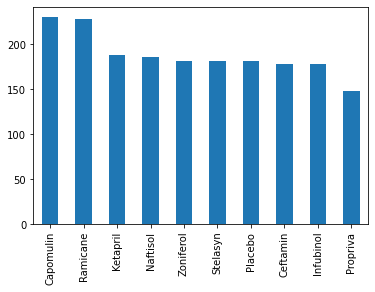

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements.plot(kind='bar')


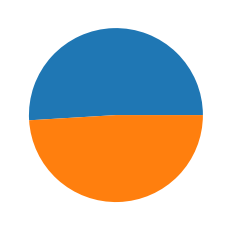

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = study_results_clean["Sex"].value_counts()
plt.pie(gender_counts)
plt.show()

<AxesSubplot:ylabel='Sex'>

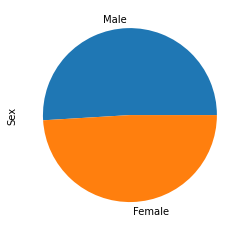

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts.plot(kind='pie')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
